In [467]:
import pandas as pd
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
warnings.filterwarnings("ignore", category=FutureWarning)

files = glob.glob('./server_results/gpt_ablation/*.csv')

In [468]:
# def plot_bars_each(ax, df, x, y1, y2, datasetname, legend=False, order=None):

#     melted_df = df.melt(
#         id_vars=[x],
#         value_vars=[y1, y2],
#         var_name="Metric",
#         value_name="Value"
#     )

#     if order is None:
#         order = df.groupby(x)[y1].mean().sort_values(ascending=False).index

#     sns.boxplot(
#         data=melted_df,
#         x=x,
#         y="Value",
#         hue="Metric",
#         ax=ax,
#         palette=sns.color_palette("Set2"),  # Use a better palette
#         order=order,
#         showfliers=False
#     )

#     ax.set_xlabel(None)
#     ax.set_ylabel("Score", fontsize=12)
#     ax.set_title(f"{datasetname}", fontsize=14, y=1.02)

#     ax.tick_params(axis='x', labelsize=12)
#     ax.tick_params(axis='y', labelsize=12)

#     if legend:
#         ax.legend(
#             title=None,
#             fontsize=12,
#             loc='lower center',
#             bbox_to_anchor=(0.5, -0.5),  # Position legend outside plot
#             ncol=len(df[y2].unique()),  # Arrange legend in a single row
#             frameon=False
#         )
#     else:
#         ax.get_legend().remove()

In [469]:
def plot(df,ax, x, metric, xaxisLabel=False, order=None):

    

    
    sns.boxplot(
        data=df,
        x=x,
        y=metric,
        ax=ax,
        palette=sns.color_palette("Set2"),  # Use a better palette
        order=order,
        showfliers=False    
    )
    if xaxisLabel:
        ax.set_xlabel('Ranker Settings', fontsize=14)
    else:
        ax.set_xlabel(None)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylabel(metric, fontsize=14)

    # if df[metric].max()<=1:
    #     ax.set_ylim(0.2,1)
    




def plot_bars_all(df, x, metrics, figsize=(10, 10), order=None, save=None):

    fig, axis = plt.subplots(len(metrics), 1, figsize=figsize, sharex=True)

    for i, metric in enumerate(metrics):
        plot(df,axis[i],  x, metric, xaxisLabel=(i==len(metrics)-1), order=order)
        
   
    sns.despine()
    
    if save is not None:
        plt.savefig(save, dpi=300) 

In [470]:
def fix_df_names(df):
    mask = df['method'].str.startswith('MatchMakerGPT_') & ~df['method'].isin(
        ['MatchMakerGPT_3', 'MatchMakerGPT_5', 'MatchMakerGPT_10', 'MatchMakerGPT_20'])
    df.loc[mask, 'method'] = 'MatchMakerGPT_All'
    df['method'] = df['method'].str.replace('MatchMakerGPT_', 'k=')

    df['method'] = df['method'].str.replace('GPTMatcherSchemaOrder', 'Schema')
    df['method'] = df['method'].str.replace('GPTMatcherRandomOrder', 'Random')

    df['method'] = df['method'].str.replace('MatchMakerBP', 'Non-LLM')

    df = df.rename(columns={'All_RecallAtSizeofGroundTruth': 'Recall@GT'})
    df = df.rename(columns={'mrr': 'MRR'})
    
    df['Runtime(s)'] = df['runtime'].round(2)


    

    return df

In [471]:
all_dfs_dict = {}

for file in files:
    df = pd.read_csv(file)
    df = fix_df_names(df)

    datasetname = df['dataset'].unique()[0]
    all_dfs_dict[datasetname] = df

    if datasetname == 'GDC':
        gdc_df = df



In [472]:
order = ['k=3', 'k=5', 'k=10', 'k=20', 'k=All', 'Schema', 'Random', 'Non-LLM']
metrics = ['MRR', 'Recall@GT', 'Runtime(s)']

ChEMBL
Magellan
Musicians
OpenData
TPC-DI
gdc_studies


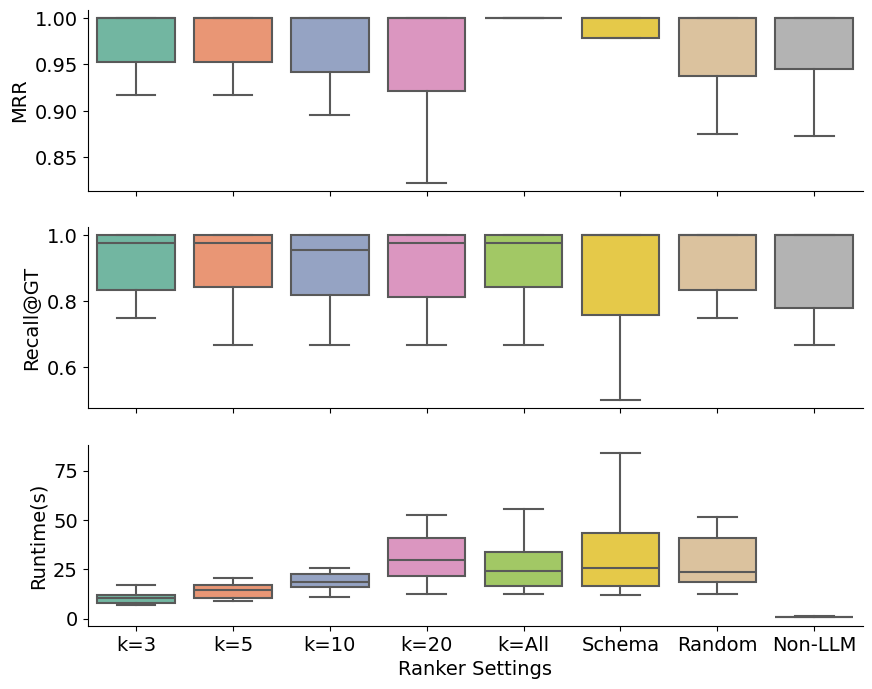

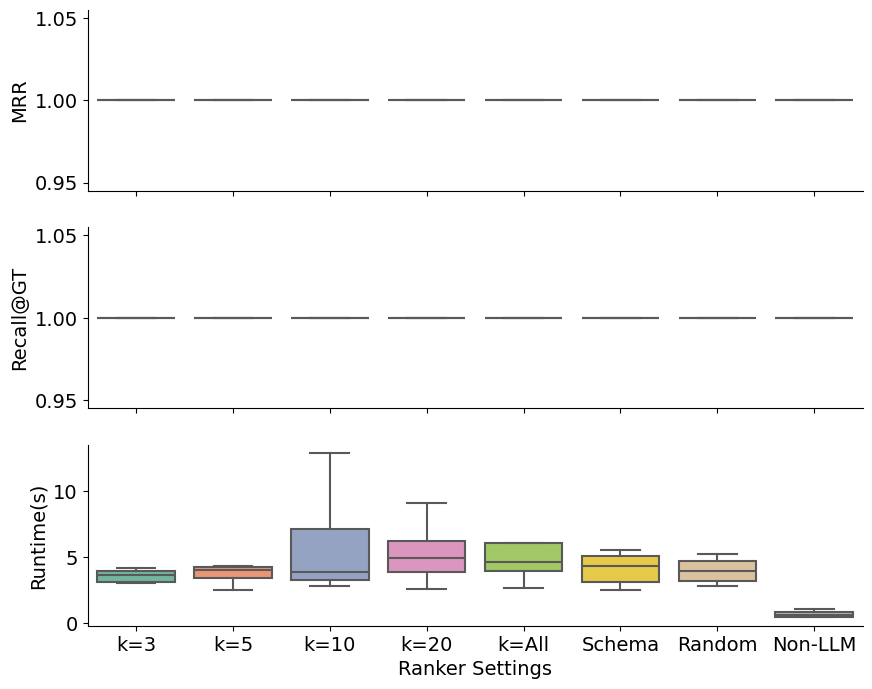

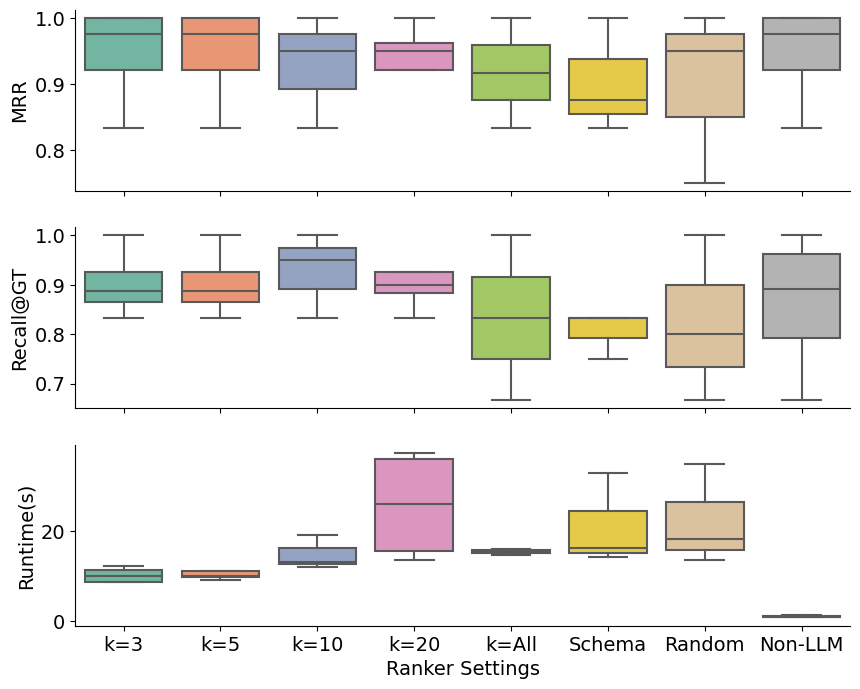

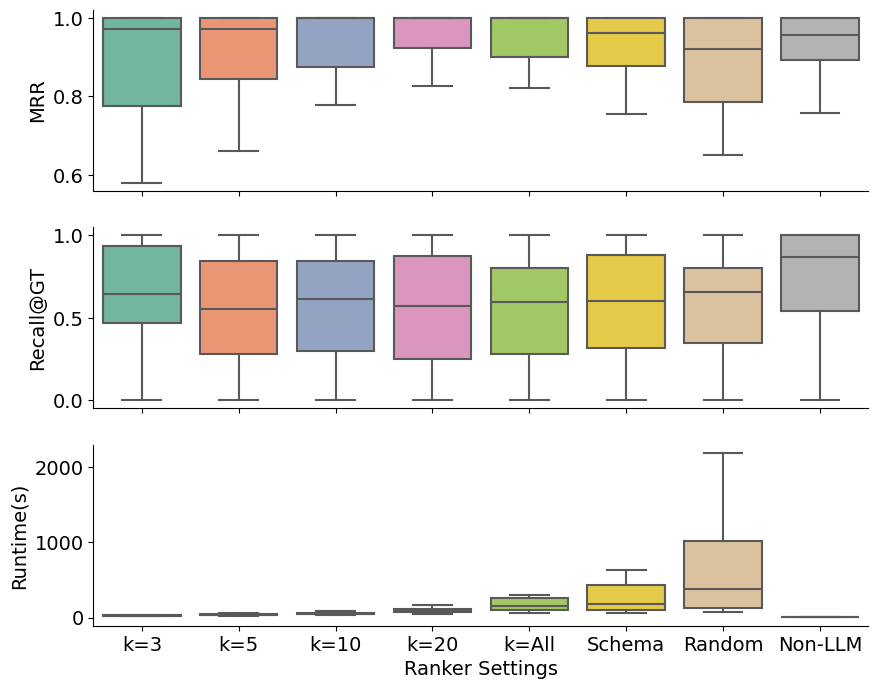

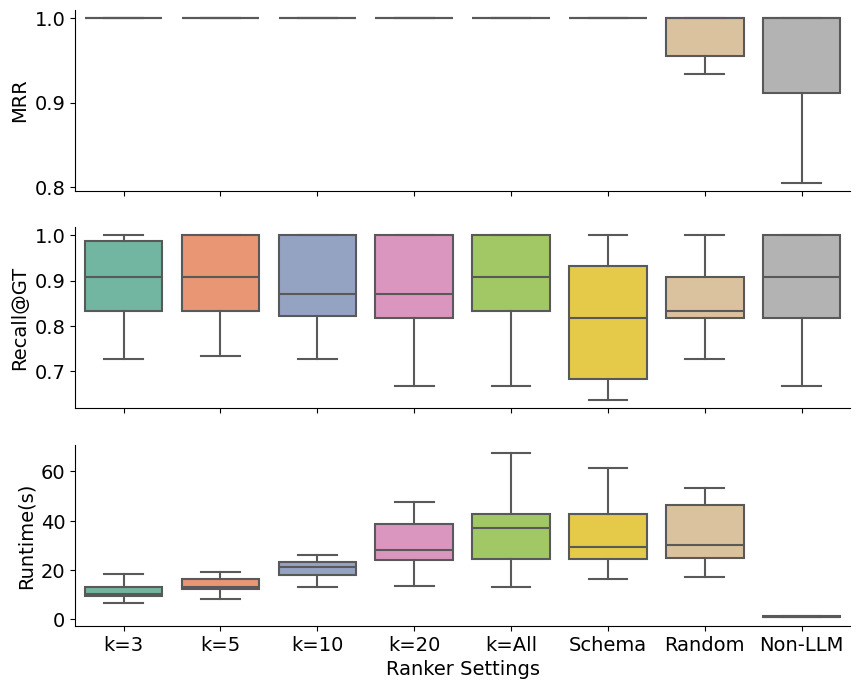

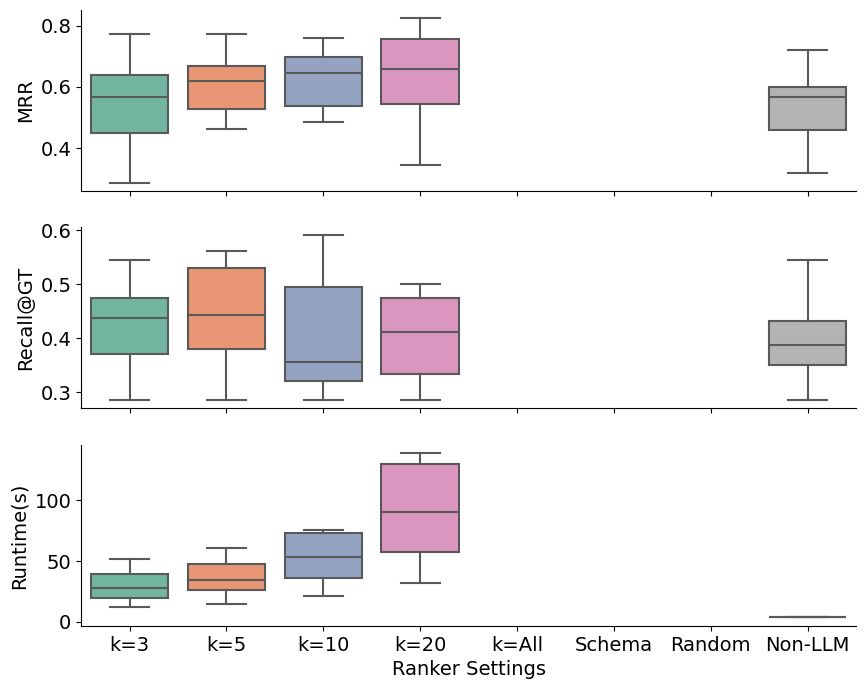

In [473]:

# fig, axis = plt.subplots(len(all_dfs_dict), 1, figsize=(12, 12), sharex=True)

for i, datasetname in enumerate(sorted(all_dfs_dict.keys())):
    print(datasetname)
    df = all_dfs_dict[datasetname]
    plot_bars_all(df, 'method', metrics, figsize= (10, 8),order=order)



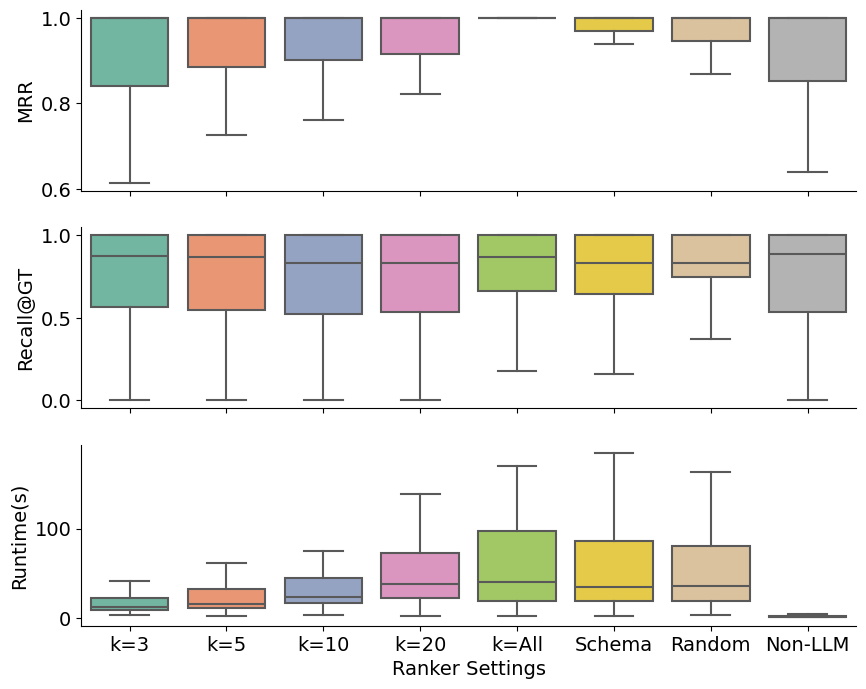

In [474]:
all_dfs = pd.concat(all_dfs_dict)
all_dfs = all_dfs.sort_values(by='dataset')
# print(all_dfs.method.unique())



plot_bars_all(all_dfs, 'method', metrics, figsize= (10, 8),order=order,  save='figures/gpt_ablation_all.pdf')